# Performance of Conventional and Non-Conventional Algorithmic Strategies in Cryptocurrency Market

# Strategies Based on Momentum

Momentum investing is a trading strategy in which investors buy the rising securities and sell them when they look to have peaked. The goal is to work with volatility by finding buying opportunities in short-term uptrends and then sell when the securities start to lose momentum. 

There are two basic types of momentum strategies. The first type is cross-sectional momentum strategies. In layman terms, we buy those instruments that have recently outperformed their peers (or a benchmark) and sell those instruments that have underperformed. The basic idea is that the instruments continue to outperform and underperform, respectively—at least for a certain period of time.  The second type is time-series momentum strategies. These strategies buy those instruments that have recently performed well and sell those instruments that have recently performed poorly. In this case, the benchmark is the past returns of the instrument itself.

# Setup

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

# Read the data from local drive

In [2]:
data = pd.HDFStore('data/BitcoinPriceData.h5', 'r')

dataMomentum = data['BitcoinPriceData']

data.close()

print(dataMomentum.info())
print('-'*20)
print('-'*20)
print(dataMomentum.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2016-01-01 to 2021-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1980 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB
None
--------------------
--------------------
               Value
Date                
2021-05-29  35689.62
2021-05-30  34647.67
2021-05-31  35684.59
2021-06-01  37310.54
2021-06-02  36662.64


In [3]:
dataMomentum.rename(columns={'Value':'price'}, inplace=True)

# Simple Time Series Momentum (Markovian)

The most simple time series momentum strategy is to buy the security if the last return was positive and to sell it if it was negative.

In [4]:
dataSMomentum = dataMomentum.copy()

In [5]:
# Returns (log scale).
dataSMomentum['returns'] = np.log(dataSMomentum['price'] / dataSMomentum['price'].shift(1))

In [6]:
# Position.
dataSMomentum['position'] = np.sign(dataSMomentum['returns'])

print(dataSMomentum.head())

             price   returns  position
Date                                  
2016-01-01  432.33       NaN       NaN
2016-01-02  433.94  0.003717       1.0
2016-01-03  432.76 -0.002723      -1.0
2016-01-04  433.00  0.000554       1.0
2016-01-05  431.90 -0.002544      -1.0


In [7]:
# Strategy based returns (log scale).
dataSMomentum['strategy'] = dataSMomentum['position'].shift(1) * dataSMomentum['returns']

print(dataSMomentum.head())

             price   returns  position  strategy
Date                                            
2016-01-01  432.33       NaN       NaN       NaN
2016-01-02  433.94  0.003717       1.0       NaN
2016-01-03  432.76 -0.002723      -1.0 -0.002723
2016-01-04  433.00  0.000554       1.0 -0.000554
2016-01-05  431.90 -0.002544      -1.0 -0.002544


In [8]:
dataSMomentum.dropna(inplace=True) 

In [9]:
# Cumulative returns over time based on simple momentum strategy (log scale).
gross_performance_simple_momentum = dataSMomentum[['returns', 'strategy']].cumsum().apply(np.exp)

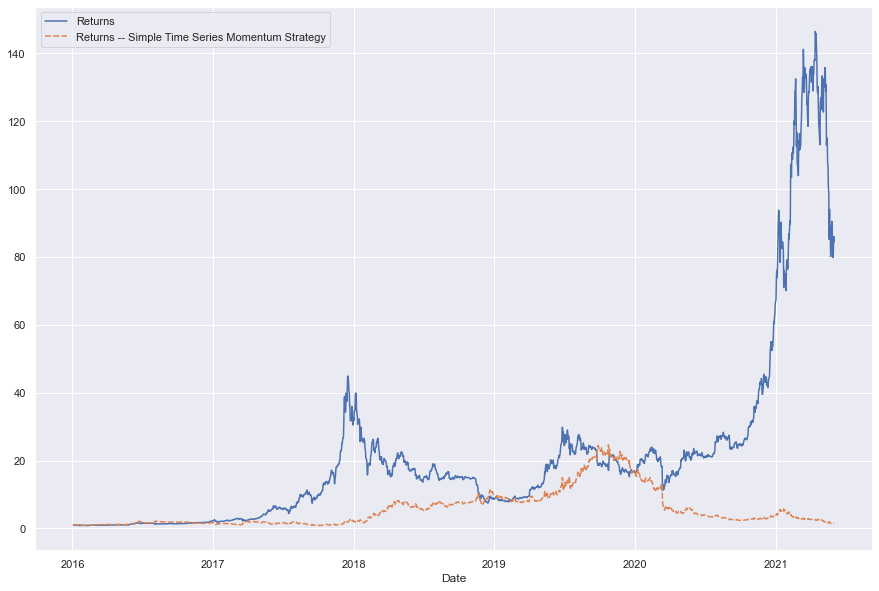

In [10]:
# Plot of cumulative returns based on the simple momentum strategy over time.
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=gross_performance_simple_momentum, legend=False)
ax.legend(['Returns', 'Returns -- Simple Time Series Momentum Strategy'])
plt.show()

Damn! That's pretty bad.

# Generalized Time Series Momentum

We can generalize the previous strategy by using mean over the last k returns to decide a position.

In [11]:
dataGMomentum = dataMomentum.copy()

In [12]:
# Returns.
dataGMomentum['returns'] = np.log(dataGMomentum['price'] / dataGMomentum['price'].shift(1))

In [13]:
# Rolling window size.
window_size = 3

# Position.
dataGMomentum['position'] = np.sign(dataGMomentum['returns'].rolling(window_size).mean())

In [14]:
# Strategy based returns (log scale).
dataGMomentum['strategy'] = dataGMomentum['position'].shift(1)*dataGMomentum['returns']

print(dataGMomentum.head())

             price   returns  position  strategy
Date                                            
2016-01-01  432.33       NaN       NaN       NaN
2016-01-02  433.94  0.003717       NaN       NaN
2016-01-03  432.76 -0.002723       NaN       NaN
2016-01-04  433.00  0.000554       1.0       NaN
2016-01-05  431.90 -0.002544      -1.0 -0.002544


In [15]:
dataGMomentum.dropna(inplace=True) 

In [16]:
# Cumulative returns over time based on momentum strategy (log scale).
gross_performance_momentum = dataGMomentum[['returns', 'strategy']].cumsum().apply(np.exp)

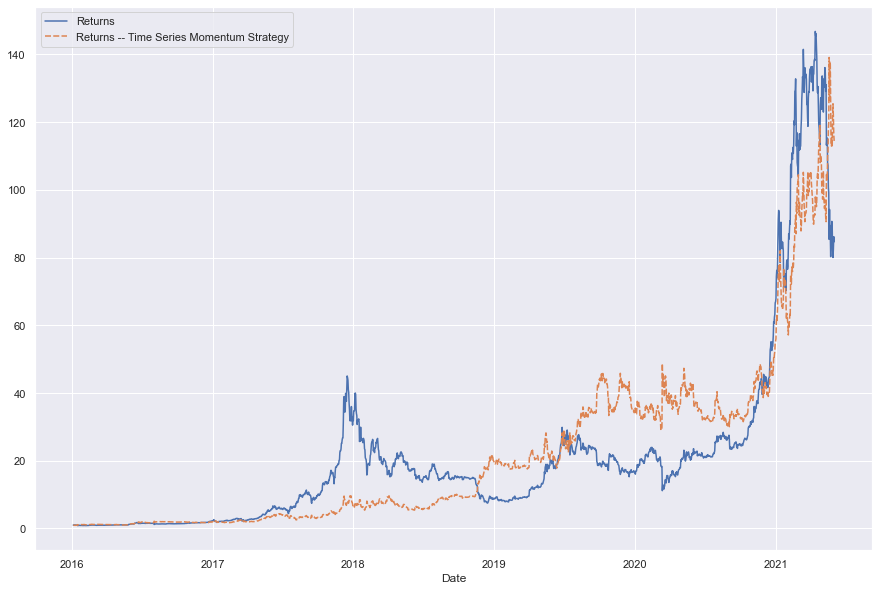

In [17]:
# Plot of cumulative returns based on the momentum strategy over time.
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=gross_performance_momentum, legend=False)
ax.legend(['Returns', 'Returns -- Time Series Momentum Strategy'])
plt.show()

Nice!

## Sensitivity to Window Size

Let's compare the strategy returns over different window sizes.

In [18]:
dataEMomentum = dataMomentum.copy()

In [19]:
# Returns.
dataEMomentum['returns'] = np.log(dataEMomentum['price'] / dataEMomentum['price'].shift(1))

In [20]:
# Strategy based returns (log scale) over different window sizes. 
column_name_toplot = ['returns']

for i in [1, 3, 5, 7, 9]: 
  dataEMomentum[f'position_wnd_sz_{i}'] = np.sign(dataEMomentum['returns'].rolling(i).mean()) 
  dataEMomentum[f'strategy_wnd_sz_{i}'] = dataEMomentum[f'position_wnd_sz_{i}'].shift(1) * dataEMomentum['returns']
  column_name_toplot.append(f'strategy_wnd_sz_{i}')

dataEMomentum.tail()

,price,returns,position_wnd_sz_1,strategy_wnd_sz_1,position_wnd_sz_3,strategy_wnd_sz_3,position_wnd_sz_5,strategy_wnd_sz_5,position_wnd_sz_7,strategy_wnd_sz_7,position_wnd_sz_9,strategy_wnd_sz_9
Date,,,,,,,,,,,,
2021-05-29,35689.62,-0.074376,-1.0,0.074376,-1.0,0.074376,1.0,-0.074376,-1.0,0.074376,-1.0,0.074376
2021-05-30,34647.67,-0.029629,-1.0,0.029629,-1.0,0.029629,-1.0,-0.029629,-1.0,0.029629,-1.0,0.029629
2021-05-31,35684.59,0.029488,1.0,-0.029488,-1.0,-0.029488,-1.0,-0.029488,1.0,-0.029488,-1.0,-0.029488
2021-06-01,37310.54,0.044557,1.0,0.044557,1.0,-0.044557,-1.0,-0.044557,-1.0,0.044557,-1.0,-0.044557
2021-06-02,36662.64,-0.017518,-1.0,-0.017518,1.0,-0.017518,-1.0,0.017518,-1.0,0.017518,1.0,0.017518


In [21]:
dataEMomentum.dropna(inplace=True)

In [22]:
dataEMomentum.head()

,price,returns,position_wnd_sz_1,strategy_wnd_sz_1,position_wnd_sz_3,strategy_wnd_sz_3,position_wnd_sz_5,strategy_wnd_sz_5,position_wnd_sz_7,strategy_wnd_sz_7,position_wnd_sz_9,strategy_wnd_sz_9
Date,,,,,,,,,,,,
2016-01-11,447.11,0.001948,1.0,-0.001948,1.0,-0.001948,1.0,0.001948,1.0,0.001948,1.0,0.001948
2016-01-12,447.98,0.001944,1.0,0.001944,-1.0,0.001944,-1.0,0.001944,1.0,0.001944,1.0,0.001944
2016-01-13,429.57,-0.041964,-1.0,-0.041964,-1.0,0.041964,-1.0,0.041964,-1.0,-0.041964,-1.0,-0.041964
2016-01-14,431.90,0.005409,1.0,-0.005409,-1.0,-0.005409,-1.0,-0.005409,-1.0,-0.005409,-1.0,-0.005409
2016-01-15,429.55,-0.005456,-1.0,-0.005456,-1.0,0.005456,-1.0,0.005456,-1.0,0.005456,-1.0,0.005456


In [23]:
# Cumulative returns over different window sizes (log scale).
gross_performance_var_wnd = dataEMomentum[column_name_toplot].cumsum().apply(np.exp)

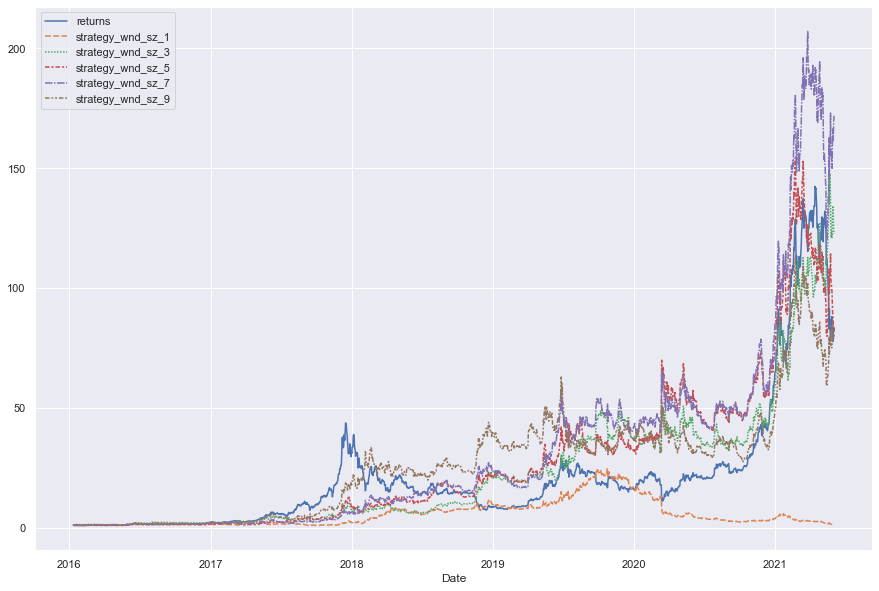

In [24]:
# Plot of cumulative returns over different window sizes.
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=gross_performance_var_wnd, legend=False)
ax.legend(column_name_toplot)
plt.show()

In [25]:
# Annualized mean returns in regular space.
annual_mean_returns = np.exp(dataEMomentum[column_name_toplot].mean() * 252) - 1

print(annual_mean_returns)

returns              0.757601
strategy_wnd_sz_1    0.048749
strategy_wnd_sz_3    0.849822
strategy_wnd_sz_5    0.760503
strategy_wnd_sz_7    0.931644
strategy_wnd_sz_9    0.752623
dtype: float64


As you can see, the best returns are over a window size of 7.

## Affect of Transaction Costs

Let's include the transaction costs into the strategy.

In [26]:
dataCMomentum = dataMomentum.copy()

In [27]:
# Returns.
dataCMomentum['returns'] = np.log(dataCMomentum['price'] / dataCMomentum['price'].shift(1))

# Amount invested (US$).
amount = 10000
# Transaction cost (constant) (log scale).
transaction_cost = 0.1/100
# Rolling window size.
wnd_sz = 7

# Position.
dataCMomentum['position'] = np.sign(dataCMomentum['returns'].rolling(wnd_sz).mean())

# Strategy based returns (log scale).
dataCMomentum['strategy'] = dataCMomentum['position'].shift(1) * dataCMomentum['returns']

dataCMomentum.dropna(inplace=True)

dataCMomentum.head()

,price,returns,position,strategy
Date,,,,
2016-01-09,452.64,0.012449,1.0,0.012449
2016-01-10,446.24,-0.014240,1.0,-0.014240
2016-01-11,447.11,0.001948,1.0,0.001948
2016-01-12,447.98,0.001944,1.0,0.001944
2016-01-13,429.57,-0.041964,-1.0,-0.041964


In [28]:
# Trades executed.
trades = dataCMomentum['position'].diff().fillna(0) != 0

trades.head()

Date
2016-01-09    False
2016-01-10    False
2016-01-11    False
2016-01-12    False
2016-01-13     True
Name: position, dtype: bool

In [29]:
# Subtract the transaction cost.
dataCMomentum['strategy'][trades] -= transaction_cost

dataCMomentum.head()

,price,returns,position,strategy
Date,,,,
2016-01-09,452.64,0.012449,1.0,0.012449
2016-01-10,446.24,-0.014240,1.0,-0.014240
2016-01-11,447.11,0.001948,1.0,0.001948
2016-01-12,447.98,0.001944,1.0,0.001944
2016-01-13,429.57,-0.041964,-1.0,-0.042964


In [30]:
# Cumulative returns (US$).
gross_performance = amount * dataCMomentum[['returns', 'strategy']].cumsum().apply(np.exp)

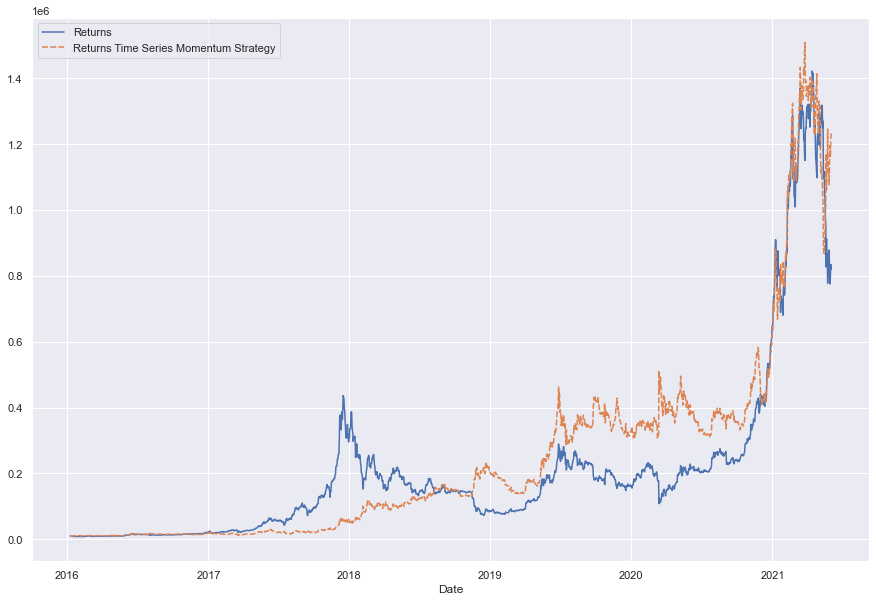

In [31]:
# Plot of cumulative returns.
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=gross_performance, legend=False)
ax.legend(['Returns', 'Returns Time Series Momentum Strategy'])
plt.show()

In [32]:
# Annualized mean returns in regular space.
print(np.exp(dataCMomentum[['returns', 'strategy']].mean() * 252) - 1)

returns     0.756194
strategy    0.849983
dtype: float64


Damn! A decrease of 10%. This clearly shows that the transaction costs can significantly offset your return if you are changing your position with high frequency.

## Summary

Momentum investing can work, but it may not be practical for all investors. As an individual investor, practising momentum investing will most likely lead to overall portfolio losses. When you purchase a rising stock or sell a falling stock, you will be reacting to older news. If you still manage to time it right, you will still have to be more conscious of the fees from transactions and how much they will eat up your returns. 

### References

1. [Introduction to Momentum Trading by Adam Barone](https://www.investopedia.com/trading/introduction-to-momentum-trading/#:~:text=Momentum%20investing%20is%20a%20trading,securities%20start%20to%20lose%20momentum.)
2. [Momentum Investing by Troy Segal](https://www.investopedia.com/terms/m/momentum_investing.asp)